In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
drive.mount('/gdrive')

train = pd.read_csv('/gdrive/My Drive/Klasifikasi/train.csv')
test = pd.read_csv('/gdrive/My Drive/Klasifikasi/test.csv')

Mounted at /gdrive


In [4]:
display(train.head())

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [5]:
print("\nDataset shapes:")
print("Train:", train.shape, "| Test:", test.shape)


Dataset shapes:
Train: (1677, 35) | Test: (1119, 34)


In [6]:
print("\nMissing values:")
print(train.isna().sum())


Missing values:
id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion

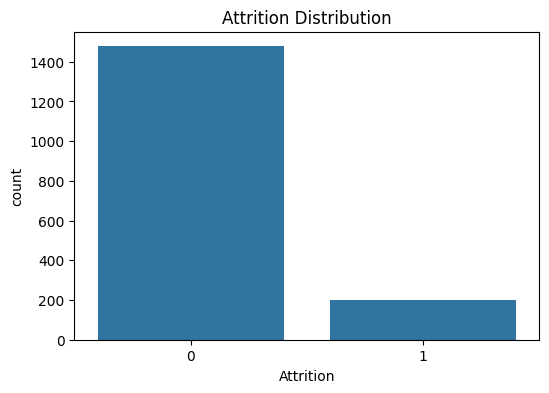

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Attrition')
plt.title("Attrition Distribution")
plt.show()

In [11]:
X = train.drop(columns=['id', 'Attrition'])
y = train['Attrition']

X_test = test.drop(columns=['id'])

In [12]:
# Split the training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
num_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

In [16]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])


In [18]:
# model pipeline
rf = RandomForestClassifier(random_state=42)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf)])

# parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Age',
                                                                          'DailyRate',
                                                                          'DistanceFromHome',
                                                                          'Education',
                                                                          'EmployeeCount',
                                                                          'EnvironmentSatisfaction',
                                                                          'HourlyRate',
                                                                          'JobInvolvement',
                                                                          'JobLevel',
                                                                          'JobSatisfaction',
                                                                          'MonthlyIncome',
                                                                          'MonthlyRate',
                                                                          'NumCom...
                                                                          'JobRole',
                                                                          'MaritalStatus',
                                                                          'Over18',
                                                                          'OverTime'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [19]:
# best parameters and score
print('Best parameters from grid search:', grid_search.best_params_)
print('Best accuracy from grid search:', grid_search.best_score_)


Best parameters from grid search: {'classifier__bootstrap': True, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Best accuracy from grid search: 0.8854415274463007


In [21]:
# Train the model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict on validation set
y_pred = best_rf.predict(X_val)
y_pred_proba = best_rf.predict_proba(X_val)[:, 1]

In [22]:
print("\nValidation Results:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_pred_proba))
print("Log Loss:", log_loss(y_val, y_pred_proba))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Validation Results:
Accuracy: 0.8738095238095238
ROC AUC: 0.8323719894758145
Log Loss: 0.3005269025437739

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       366
           1       0.67      0.04      0.07        54

    accuracy                           0.87       420
   macro avg       0.77      0.52      0.50       420
weighted avg       0.85      0.87      0.82       420



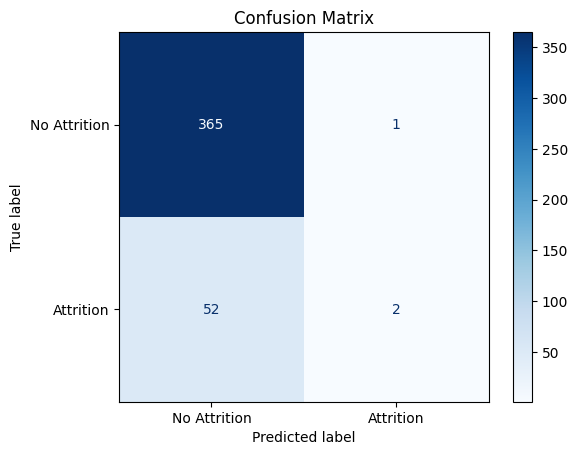

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

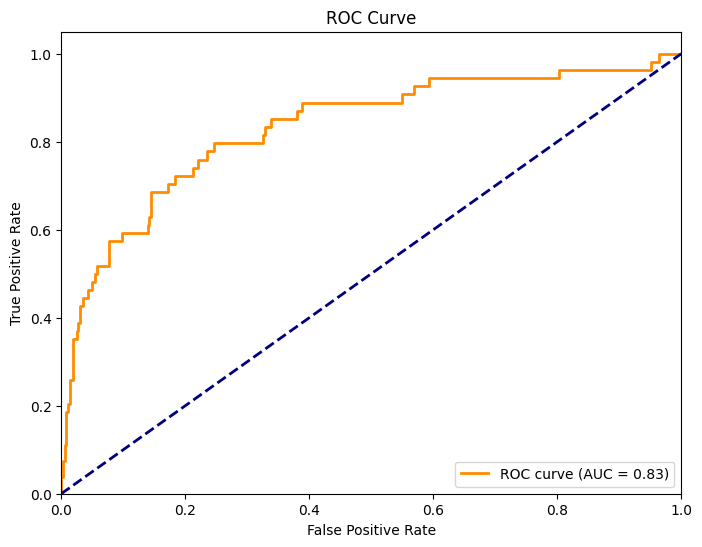

In [24]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
# Feature Importances
feature_importances = best_rf.named_steps['classifier'].feature_importances_
feature_names = num_features + list(best_rf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_features))
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(10)

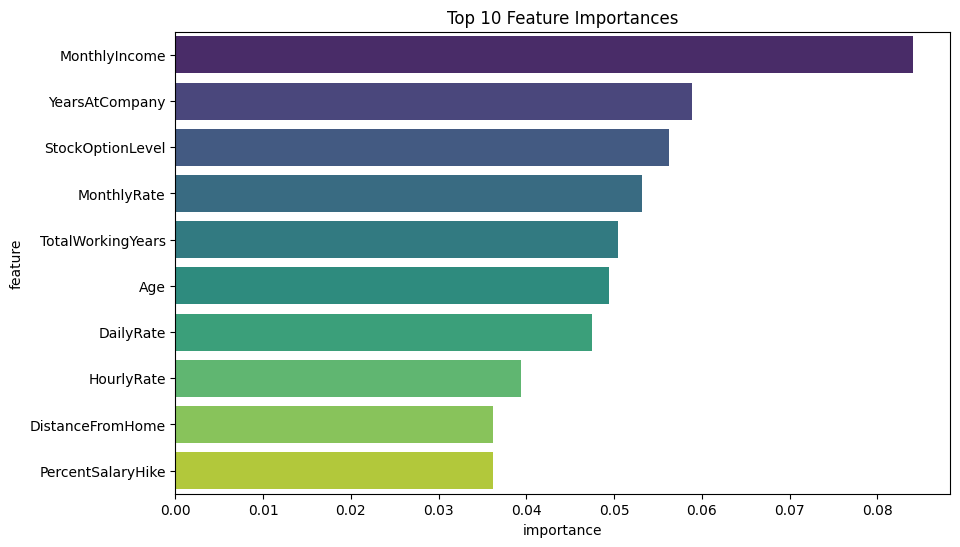

In [28]:
# Top 10 Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis', hue='feature', legend=False)
plt.title("Top 10 Feature Importances")
plt.show()

In [27]:
# Predict on test set
y_pred_test_proba = best_rf.predict_proba(X_test)[:, 1]

# Submission file
output = pd.DataFrame({
    'id': test.id,
    'Attrition': y_pred_test_proba
})
output.to_csv('/gdrive/My Drive/Klasifikasi/submission.csv', index=False)
print("\nSubmission file has been saved.")


Submission file has been saved.
